In [ ]:
print("hello")


In [ ]:
print("zhengkai111")

In [ ]:
print("haha")


In [ ]:
a=1
b=1.1
%whos
%whos int
print("查看变量")

In [3]:
from cdo import *
# https://mp.weixin.qq.com/s/MY5eWPgoYf4mUL7qCdpOqA

In [7]:
from cdo import *
cdo=Cdo()
cdo.sinfon(input = "/Users/zhengkai/OneDrive/master_road/script/python/pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc")
# cdo.timmean(input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc", output = "wrfmean.nc")
ff = cdo.readCdf("wrfmean.nc")

In [8]:
# conda install xarray
# conda install netCDF4
# conda install -c conda-forge netCDF4
# conda install -c conda-forge xarray

In [9]:
DJF=cdo.selseason("DJF",input="Eoi400-Eoi280_echam5_last100year_catted_pr_ymonmean_r360x180.nc",returnArray = "precip")
DJF.shape

(3, 180, 360)

In [ ]:
DJF=cdo.timmean(input= "-selseason,DJF " + "Eoi400-Eoi280_echam5_last100year_catted_pr_ymonmean_r360x180.nc",returnArray = "precip")
DJF.shape



In [ ]:
JJA=cdo.timmean(input= "-selseason,JJA " + "Eoi400-Eoi280_echam5_last100year_catted_pr_ymonmean_r360x180.nc",returnArray = "precip")
JJA.shape

In [ ]:
ANN=cdo.timmean(input= "Eoi400-Eoi280_echam5_last100year_catted_pr_ymonmean_r360x180.nc",returnArray = "precip")
ANN.shape

In [ ]:
cdo.selname("precip",input = "-seltimestep,1/5 " + "Eoi400-Eoi280_echam5_last100year_catted_pr_ymonmean_r360x180.nc", output = "mult.nc", option = "-f nc")

In [ ]:
# print(tsurf.variables["tsurf"])
x = ff.variables["tsurf"]
x.shape

In [ ]:
# cdo.copy(input = "wrfout_d02_2016-06-23_06_00_00", output = "wrfcopy.grb", option = "-f grb")
# time cdo.seltimestep("1/3",input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc", output = "wrfsub1.grb", option = "-f grb")
# cdo.selname("SCW,SCTOT,SCH,SCS,REFL_10CM",input = "-seltimestep,1/5 " + "wrfout_d02_2016-06-23_06_00_00", output = "wrfsub.grb", option = "-f grb")
# oro = cdo.setrtomiss(-10000, 0, input =  cdo.topo( options =  '-f nc'), returnMaArray =  'topo')



In [ ]:
# 保存变量
t = cdo.seltimestep("1/3", input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc", options = "-f nc", returnArray = "tsurf")
t.shape

In [ ]:
# 多线程
from cdo import *
import multiprocessing

def showvar(arg):
    return cdo.showvar(input=arg)

cdo       = Cdo()
cdo.debug = True
ifile     = './wrfmean.nc'
pool      = multiprocessing.Pool(1)
results   = []

for i in range(0,5):
    results.append(pool.apply_async(showvar, [ifile]))

pool.close()
pool.join()

for res in results:
    print(res.get())

In [19]:
# 文件不输出
from cdo import *
cdo=Cdo()
# cdo.forceoutput   =  True/False
# f1=cdo.selname("tsurf", input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc",force = False, returnCdf = True)
f1=cdo.selname("tsurf", input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc", returnCdf = True)
f1.variables["tsurf"].shape



(1, 180, 360)

In [5]:
# 输出文件信息

from cdo import *
cdo=Cdo()
f=cdo.selname("tsurf", input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc", returnArray = "tsurf")
f.shape



(1, 180, 360)

In [ ]:
f=cdo.selname("tsurf", input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc",returnCdf = True)
t = f.variables["tsurf"]
t.shape

In [ ]:
%whos

In [ ]:
import os
os.getcwd()

In [1]:
# %reset
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import matplotlib as mpl
import pandas as pd
import scipy.stats as stats
# from sklearn import linear_model #不需要
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader, natural_earth
import matplotlib.path as mpath
import matplotlib.ticker as mticker
origin = 'lower'


In [13]:
# conda install -c conda-forge sklearn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - sklearn

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [4]:

from cdo import *
cdo=Cdo()
f=cdo.selname("tsurf", input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc",returnCdf = True)
t = f.variables["tsurf"]
T=t[0,:,:]
T.shape
lon = f.variables["lon"]
lon.shape
lat = f.variables["lat"]

In [16]:
def make_map(scale,box,xstep,ystep):
    fig=plt.figure(figsize=(10,8))
    proj = ccrs.PlateCarree()  # ´´½¨×ø±êÏµ
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  
    ax.set_extent(box,crs=ccrs.PlateCarree())
    land = cfeature.NaturalEarthFeature('physical', 'land', scale, edgecolor='face',facecolor=cfeature.COLORS['land'])
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', scale, edgecolor='face',facecolor=cfeature.COLORS['water'])
    # ax.add_feature(land, facecolor='0.75',zorder = 2)
    ax.add_feature(ocean, facecolor='#FFFFFF')
    ax.coastlines(scale,zorder = 2)
    #===================================================
    #ax.add_feature(cfeature.BORDERS,zorder = 2)
    ax.stock_img()
    #===================================================
    
    ax.set_xticks(np.arange(box[0],box[1]+xstep,xstep), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(box[2],box[3]+ystep,ystep), crs=ccrs.PlateCarree())

    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
    ax.grid()
    return fig,ax
box=[-180,180,-90,90]

/opt/anaconda3/envs/pyn_env/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/opt/anaconda3/envs/pyn_env/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]


<ipython-input-17-894c7e5f23d7>:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("seismic"))
  CS.cmap.set_under('#151578')
<ipython-input-17-894c7e5f23d7>:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("seismic"))
  CS.cmap.set_over('#53170F')
/opt/anaconda3/envs/pyn_env/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'i

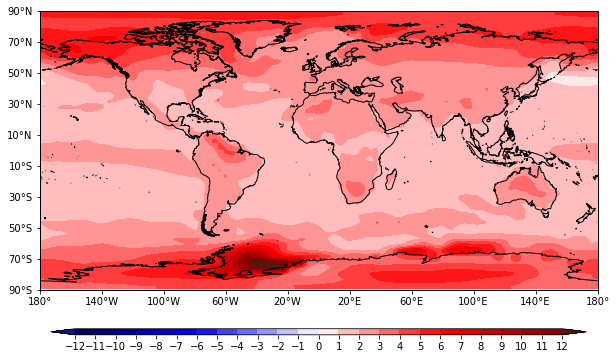

In [17]:
X,Y = np.meshgrid(lon,lat)
fig,ax=make_map(scale='50m',box=box,xstep=40,ystep=20)
# ##SIC
# q = plt.quiver(X[::2, ::2], Y[::2, ::2], U[::2, ::2], V[::2, ::2]
# 	,color='#000000',scale=1,headlength=3,headaxislength=2.5,transform=ccrs.PlateCarree(),zorder = 2)  #,headwidth=1,minshaft=2
# plt.quiverkey(q, X=0.95, Y=1.05, U=0.1,color='#1A1A1A',
# 			label='0.1 (pa)', labelpos='S')		
# '''
# SICOMO,levels=[-2.0,-1.8,-1.6,-1.4,-1.2,-1.0,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
# levels=[-20,-16,-12,-8,-4,0,4,8,12,16,20]
# levels=[-2.0,-1.8,-1.6,-1.4,-1.2,-1.0,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
levels=np.arange(-12,13,1)
print(levels)
# levels=[x*2 for x in levels]
CS=plt.contourf(X,Y,T,cmap='seismic',levels=levels,origin=origin,extend='both',zorder = 2) 
CS.cmap.set_under('#151578')
CS.cmap.set_over('#53170F')		
# CS=plt.contourf(X,Y,U_SIC,cmap='seismic_r',levels=[-20,-16,-12,-8,-4,0,4,8,12,16,20] ,origin=origin,extend='both',zorder = 2) 
# CS.cmap.set_under('#53170F')
# CS.cmap.set_over('#151578')
#cbar=plt.colorbar()   'vertical'
cbar=fig.colorbar(CS,orientation='horizontal',aspect=80, shrink=0.96,fraction=0.08, pad=0.09)
cbar.ax.tick_params(labelsize=10)
# cbar.set_ticks([-20,-16,-12,-8,-4,0,4,8,12,16,20])
levels1=np.arange(-12,13,1)
cbar.set_ticks(levels1)

# cbar.set_ticklabels(('-20','-16','','-12','','-8','','-4','','0','','4','','8','','12','','16','','20'))

plt.show()

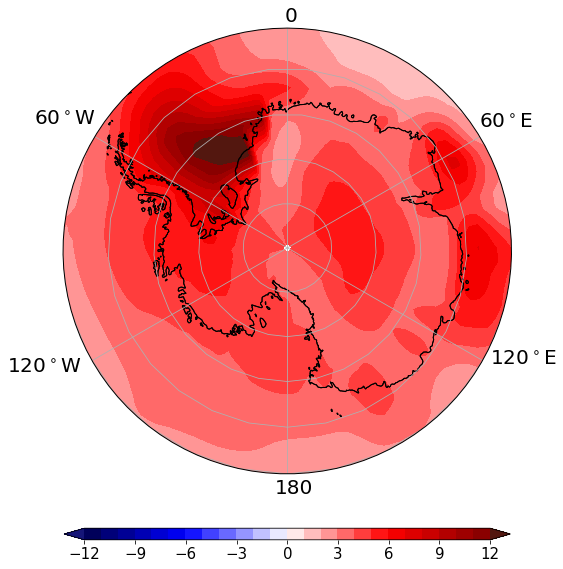

In [2]:
from cdo import *
cdo=Cdo()
f=cdo.selname("tsurf", input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc",returnCdf = True)
t = f.variables["tsurf"]
T=t[0,:,:]
T.shape
LON = f.variables["lon"]
# LON.shape
LAT = f.variables["lat"]
fig=plt.figure(figsize=(10,10))
f1_ax1 = plt.axes(projection = ccrs.SouthPolarStereo())
box=[-180, 180, -60, -90]
xstep,ystep=30,30
    # Limit the map to -60 degrees latitude and below.
f1_ax1.set_extent(box, crs=ccrs.PlateCarree())
f1_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
scale='50m'
##
#land = cfeature.NaturalEarthFeature('physical', 'land', scale,edgecolor='face',facecolor=cfeature.COLORS['land'])
#f1_ax1.add_feature(land, facecolor='0.95')
f1_ax1.coastlines(scale)

#×¢Òâ´Ë´¦Ìí¼ÓÁËprojection = ccrs.NorthPolarStereo()£¬Ö¸Ã÷¸ÃaxesÎª±±°ëÇò¼«µØÍ¶Ó°
f1_ax1.gridlines()
f1_ax1.ylocator=mticker.FixedLocator(np.arange(0,90,30))#ÊÖ¶¯ÉèÖÃxÖá¿Ì¶È
f1_ax1.xlocator=mticker.FixedLocator(np.arange(-180,180,30))#ÊÖ¶¯ÉèÖÃxÖá¿Ì¶È
#f1_ax1.set_extent(img_extent, ccrs.PlateCarree())

#######ÒÔÏÂÎªÍø¸ñÏßµÄ²ÎÊý######
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
##############################
f1_ax1.set_boundary(circle, transform=f1_ax1.transAxes)
ticks=np.arange(0,210,60)
etick=['0']+['%d$^\circ$E'%tick for tick in ticks if (tick !=0) & (tick!=180)]+['180']
wtick=['%d$^\circ$W'%tick for tick in ticks if (tick !=0) & (tick!=180)]
labels=etick+wtick


from cartopy.util import add_cyclic_point
lon=[]
lon[:] = [x  for x in LON]
lon.append(360.0)
lat=[]
lat[:] = [x  for x in LAT]
# print(lon[:])
T = add_cyclic_point(T)

X,Y = np.meshgrid(lon,lat)
# xticks=[-0.8,58,120,182.9,-62,-114]
# yticks=[-57]+[-57]+[-55]+[-55]+[-48]+[-45]
xticks=[-0.8,58,120,182.9,-64,-114]
# yticks=[-57]+[-57]+[-55]+[-55]+[-48]+[-45]
yticks=[-60]+[-60]+[-59]+[-57.5]+[-53]+[-50]

#±ê×¢¾­Î³¶È   
#ax.text(0.01,0.23,'60$^\circ$W',transform=ax.transAxes,rotation=25)
#ax.text(-63,50,'60$^\circ$W',transform=ccrs.Geodetic(),rotation=25)

for xtick,ytick,label in zip(xticks,yticks,labels):
    f1_ax1.text(xtick,ytick,label,transform=ccrs.Geodetic(),fontsize=20)
levels=np.arange(-12,13,1)
CS=plt.contourf(X,Y,T,cmap='seismic',levels=levels,origin=origin,extend='both',transform=ccrs.PlateCarree()) 
CS.cmap.set_under('#151578')
CS.cmap.set_over('#53170F')
#cbar=plt.colorbar()   'vertical'
cbar=fig.colorbar(CS,orientation='horizontal',aspect=35, shrink=0.8,fraction=0.08, pad=0.1)
cbar.ax.tick_params(labelsize=15)
# cbar.set_ticks([0,10,20,30,40,50,60,70,80,90])
# cbar.set_ticklabels(('0','10','20','30','40','50','60','70','80','90'))
# # '''
# plt.text(-130,-45,"<%s> %s ustrw_vstrw" %(model,yue),weight='light',color='black',fontsize=15,transform=ccrs.PlateCarree())
# #plt.title("*1e-7",loc='right',fontsize=20)
# import os
# os.makedirs(r"../pic/python/%s" % model,exist_ok=True)
# plt.savefig(r"../pic/python/%s/%s %s ustrw_vstrw jishe.png" %(8model,yue,model),bbox_inches='tight', dpi=150, pad_inches=-0.005)